In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

import time

In [2]:
cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']

In [4]:
cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

In [6]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1296
1296
432
432


In [7]:
target.value_counts()

4    1210
3     384
2      69
1      65
Name: class, dtype: int64

In [8]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A1/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A1/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [9]:
from sklearn import svm
from sklearn.svm import SVC
svm_l = svm.SVC(kernel='linear')

<Figure size 432x288 with 0 Axes>

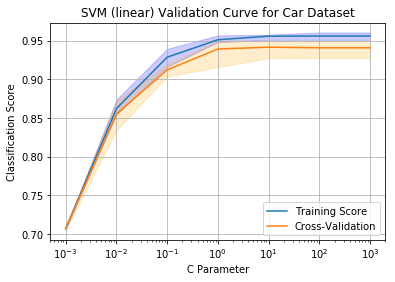

<Figure size 432x288 with 0 Axes>

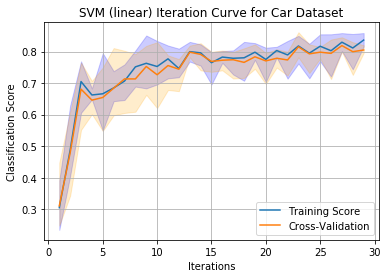

In [10]:
plt.figure()
train_scores, test_scores = validation_curve(svm_l, X_train_std, Y_train, param_name="C", param_range=np.logspace(-3, 3, 7), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(np.logspace(-3, 3, 7), avg_train_score, label='Training Score')
plt.semilogx(np.logspace(-3, 3, 7), avg_test_score, label='Cross-Validation')

plt.fill_between(np.logspace(-3, 3, 7), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(np.logspace(-3, 3, 7), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('SVM (linear) Validation Curve for Car Dataset')
plt.xlabel('C Parameter')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

plt.figure()
train_scores, test_scores = validation_curve(svm_l, X_train_std, Y_train, param_name="max_iter", param_range=np.arange(1,30, 1), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.plot(np.arange(1,30, 1), avg_train_score, label='Training Score')
plt.plot(np.arange(1,30, 1), avg_test_score, label='Cross-Validation')

plt.fill_between(np.arange(1,30, 1), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(np.arange(1,30, 1), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('SVM (linear) Iteration Curve for Car Dataset')
plt.xlabel('Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

In [13]:
svm_r = svm.SVC(kernel='rbf')

<Figure size 432x288 with 0 Axes>

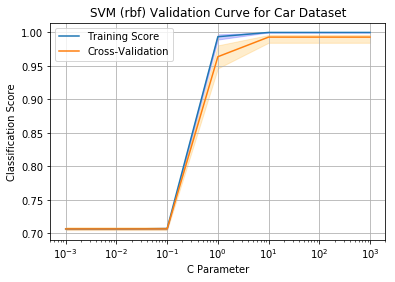

<Figure size 432x288 with 0 Axes>

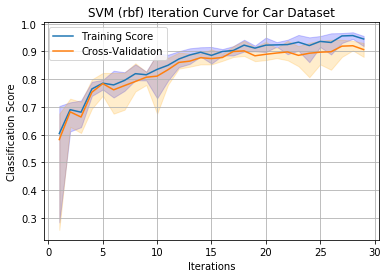

In [14]:
plt.figure()
train_scores, test_scores = validation_curve(svm_r, X_train_std, Y_train, param_name="C", param_range=np.logspace(-3, 3, 7), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.semilogx(np.logspace(-3, 3, 7), avg_train_score, label='Training Score')
plt.semilogx(np.logspace(-3, 3, 7), avg_test_score, label='Cross-Validation')

plt.fill_between(np.logspace(-3, 3, 7), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(np.logspace(-3, 3, 7), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('SVM (rbf) Validation Curve for Car Dataset')
plt.xlabel('C Parameter')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

plt.figure()
train_scores, test_scores = validation_curve(svm_r, X_train_std, Y_train, param_name="max_iter", param_range=np.arange(1,30, 1), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()

plt.plot(np.arange(1,30, 1), avg_train_score, label='Training Score')
plt.plot(np.arange(1,30, 1), avg_test_score, label='Cross-Validation')

plt.fill_between(np.arange(1,30, 1), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(np.arange(1,30, 1), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('SVM (rbf) Iteration Curve for Car Dataset')
plt.xlabel('Iterations')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

In [16]:
best_svm_l = GridSearchCV(svm_l, param_grid={'C' : np.logspace(-2, 1, 10)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_svm_l.fit(X_train, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_svm_l.predict(X_test)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_svm_l.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  0.5608499050140381
Test Time:  0.0034558773040771484
Top Accuracy: 93.28703703703704
Top params:  {'C': 10.0}
[[ 20   0   0   0]
 [  1  14   0   0]
 [  1   9  81  12]
 [  0   0   6 288]]


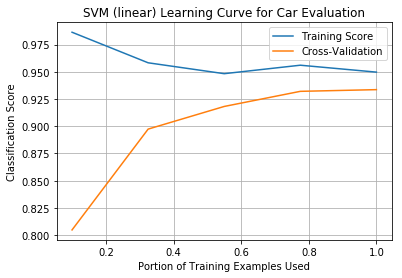

In [17]:
train_sizes, train_scores, test_scores = learning_curve(best_svm_l, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('SVM (linear) Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

In [18]:
best_svm_r = GridSearchCV(svm_r, param_grid={'C' : np.logspace(-2, 1, 10)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_svm_r.fit(X_train, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_svm_r.predict(X_test)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_svm_r.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  0.8395202159881592
Test Time:  0.006145954132080078
Top Accuracy: 96.75925925925925
Top params:  {'C': 10.0}
[[ 20   0   0   0]
 [  1  14   0   0]
 [  3   7  91   2]
 [  0   0   1 293]]


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A1/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


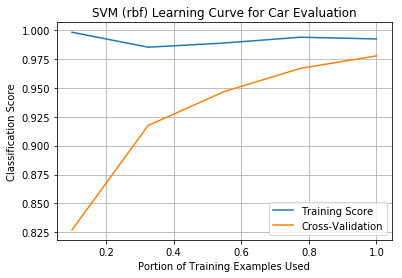

In [19]:
train_sizes, train_scores, test_scores = learning_curve(best_svm_r, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('SVM (rbf) Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()